In [139]:
#  import the packages i  will use 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read  the data
df = pd.read_csv(r'C:\Users\dimon\OneDrive\Pulpit\Nowy folder (3)\movies.csv')

In [140]:
# a look at the data

df.head( )

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [141]:
#check for a missing data

round(100* df.isnull( ).sum( )/ len(df),2)

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

In [142]:
# Data Types
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [143]:
# correct dateformat 
df['released']=pd.to_datetime(df['released'].str.split(r'(').str[0],infer_datetime_format=True)

In [144]:
#update year column with right values 
df['Year'] = df['released'].astype(str).str[:4]
df.head( )

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [145]:
# Order data
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [146]:
pd.set_option('display.max_rows', None)

In [147]:
#drop duplicates 
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


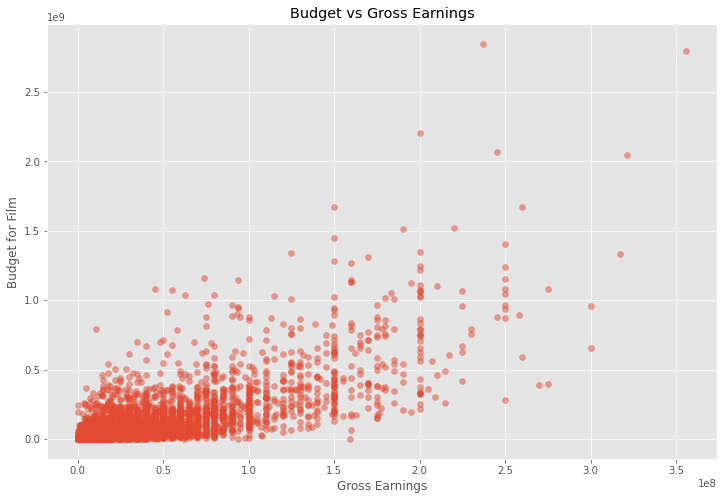

In [148]:
#scatter plot budget vs gross
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='gross', ylabel='budget'>

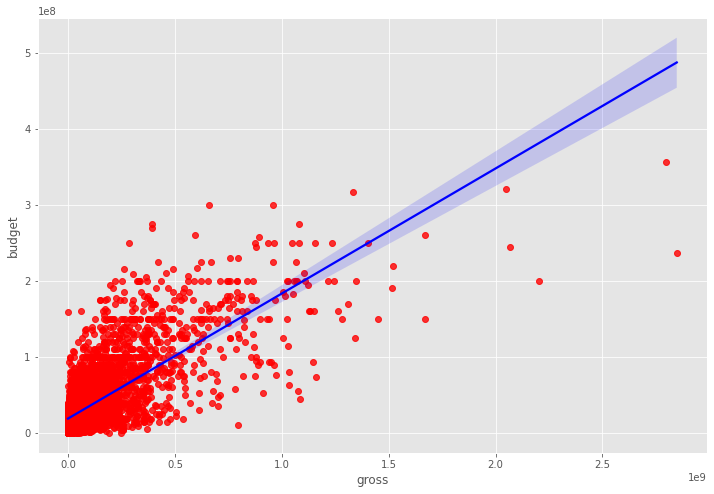

In [149]:
#plot budget vs gross by regplot

sns.regplot(x="gross", y="budget", data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

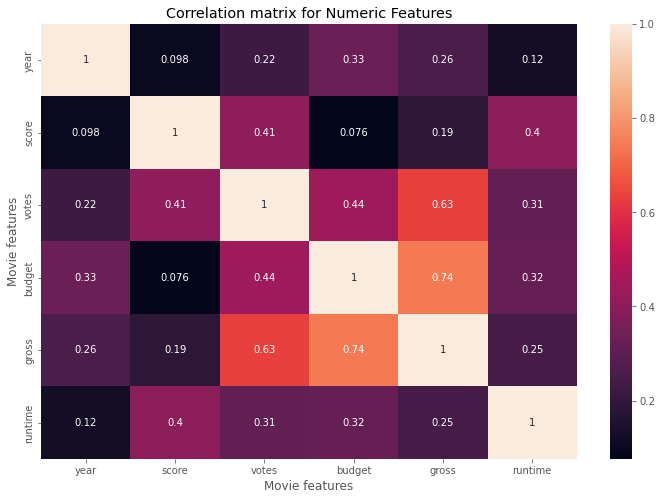

In [150]:
#correlation 
correlation_matrix=df.corr(method ='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")
plt.show()

In [151]:
# top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [152]:
#convert data into numerical
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,533,5,0,2009,2009-12-18,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,2019-04-26,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,1997-12-19,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,2015-12-18,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,2018-04-27,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


In [153]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.008069,0.016355,0.011453,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.997295
score,0.017097,-0.001314,0.027965,0.097995,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027576
country,-0.010737,0.081244,-0.037615,-0.070938,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.054063,0.092129,0.095548,-0.078412,-0.082274


In [154]:
correlation_mat=df_numerized.corr( )
corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
          Year        0.011134
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
          Year        0.007054
genre     name        0.016355
          rating      0.072423
        

In [155]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre     budget     -0.356564
budget    genre      -0.356564
genre     gross      -0.235650
gross     genre      -0.235650
budget    rating     -0.176002
rating    budget     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
Year      country    -0.082274
country   Year       -0.082274
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
Year      genre      -0.077550
genre     Year       -0.077550
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star    

In [156]:
# pairs with high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
year      Year        0.997295
Year      year        0.997295
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64
